In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
%matplotlib inline

In [15]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
y = train_set['label']
del train_set['label']
train_set = train_set.to_numpy()
test_set =test_set.to_numpy()
train_set = train_set/255
test_set = test_set/255
train_set = train_set.reshape(42000,28,28,1)
test_set = test_set.reshape(28000,28,28,1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_set, y, test_size=0.33, random_state=42)


In [33]:
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        Dense(200,activation = 'relu',name = 'layer1'),
        Dense(128,activation = 'relu',name = 'layer2'),
        Dense(10,activation = 'linear',name = 'layer')
        ### END CODE HERE ### 
    ], name = "my_model" 
)


In [34]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0  

In [35]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    X_train,y_train,
    epochs=20
)

Epoch 1/20
880/880 [==============================] - 22s 22ms/step - loss: 0.3634 - accuracy: 0.8803
Epoch 2/20
880/880 [==============================] - 19s 22ms/step - loss: 0.1204 - accuracy: 0.9624
Epoch 3/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0869 - accuracy: 0.9725
Epoch 4/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 5/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0569 - accuracy: 0.9819
Epoch 6/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0510 - accuracy: 0.9834
Epoch 7/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0389 - accuracy: 0.9873
Epoch 8/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 9/20
880/880 [==============================] - 19s 22ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 10/20
880/880 [==============================] - 19s 22ms/step - loss: 0.029

In [36]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

434/434 - 4s - loss: 0.0925 - accuracy: 0.9804 - 4s/epoch - 10ms/step

Test accuracy: 0.9803751707077026


In [37]:
y_predict = model.predict(test_set)


875/875 [==============================] - 8s 9ms/step


In [38]:
prediction_p = tf.nn.softmax(y_predict)
yhat = np.zeros(28000)
for i in range(28000):
    yhat[i] = np.argmax(prediction_p[i])
yhat

array([2., 0., 9., ..., 3., 9., 2.])

In [39]:
ID = np.arange(1,28001)
ID = pd.DataFrame(ID,columns= ['ImageId'])
output = pd.concat([ID,pd.DataFrame(yhat,columns = ['Label'],dtype = int)],axis = 1)
output.to_csv('submission-digit.csv', index=False)

In [ ]:
print(pd.DataFrame(yhat,columns = ['Label'],dtype = int))

In [78]:
def randomTest():
  fig, ax = plt.subplots(5, 5, figsize=(15, 15))
  for index, axi in enumerate(ax.flat):
    axi.imshow(test_images[index].reshape(28, 28), cmap='gray', interpolation='nearest')
    axi.set(xticks=[], yticks=[],
           xlabel=str(yhat[index]))
plt.show()

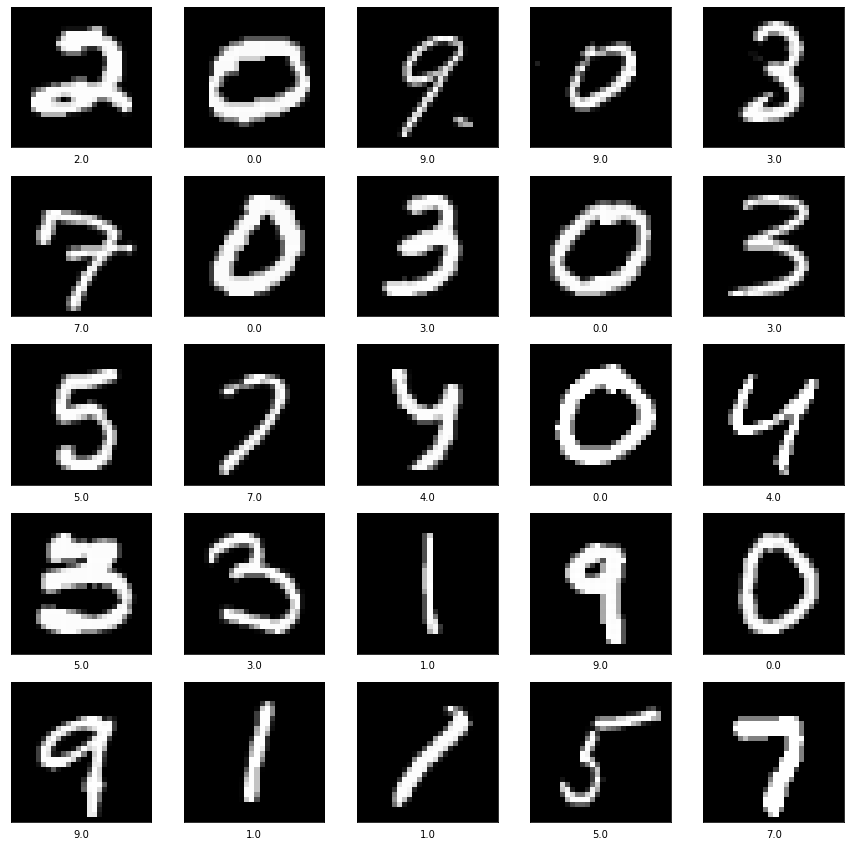

In [79]:
randomTest()